#   Jamboree Education-Linear Regression

To predict the chance of admit to IVY League college with the information provided in the dataset using new feature launched in their website.

In [3]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns=None
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")
from tqdm import tqdm
import time

In [4]:
#Read the dataset
df = pd.read_csv('Jamboree_Admission.txt')

Basic EDA 
Identifying number of features or columns.
Know all the names of columns.

In [220]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

Also the datatypes and total samples 

In [221]:
# checking which columns are having categorical,numerical or boolean values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial No.           500 non-null int64
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


 Knowing more mathematical relations b/w them like min ,max,mean etc

In [1]:
df.describe()

NameError: name 'df' is not defined

In [223]:
df.shape

(500, 9)

Getting Unique Values of columns

In [224]:
for x in df.columns:
    print(x, ':',len(df[x].unique()))

Serial No. : 500
GRE Score : 49
TOEFL Score : 29
University Rating : 5
SOP : 9
LOR  : 9
CGPA : 184
Research : 2
Chance of Admit  : 61


In [225]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

From above observation, there are no null values --> no missing values.

Drop the unwanted columns

In [226]:
# Dropping the serial No.column as we don't have any importance of it while predicting the target
df.drop(['Serial No.'],axis = 1,inplace =True)

In [227]:
df.head(10)
#Serial No. column dropped as we can see it in the head of dataframe

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
5,330,115,5,4.5,3.0,9.34,1,0.90
6,321,109,3,3.0,4.0,8.20,1,0.75
7,308,101,2,3.0,4.0,7.90,0,0.68
8,302,102,1,2.0,1.5,8.00,0,0.50
9,323,108,3,3.5,3.0,8.60,0,0.45


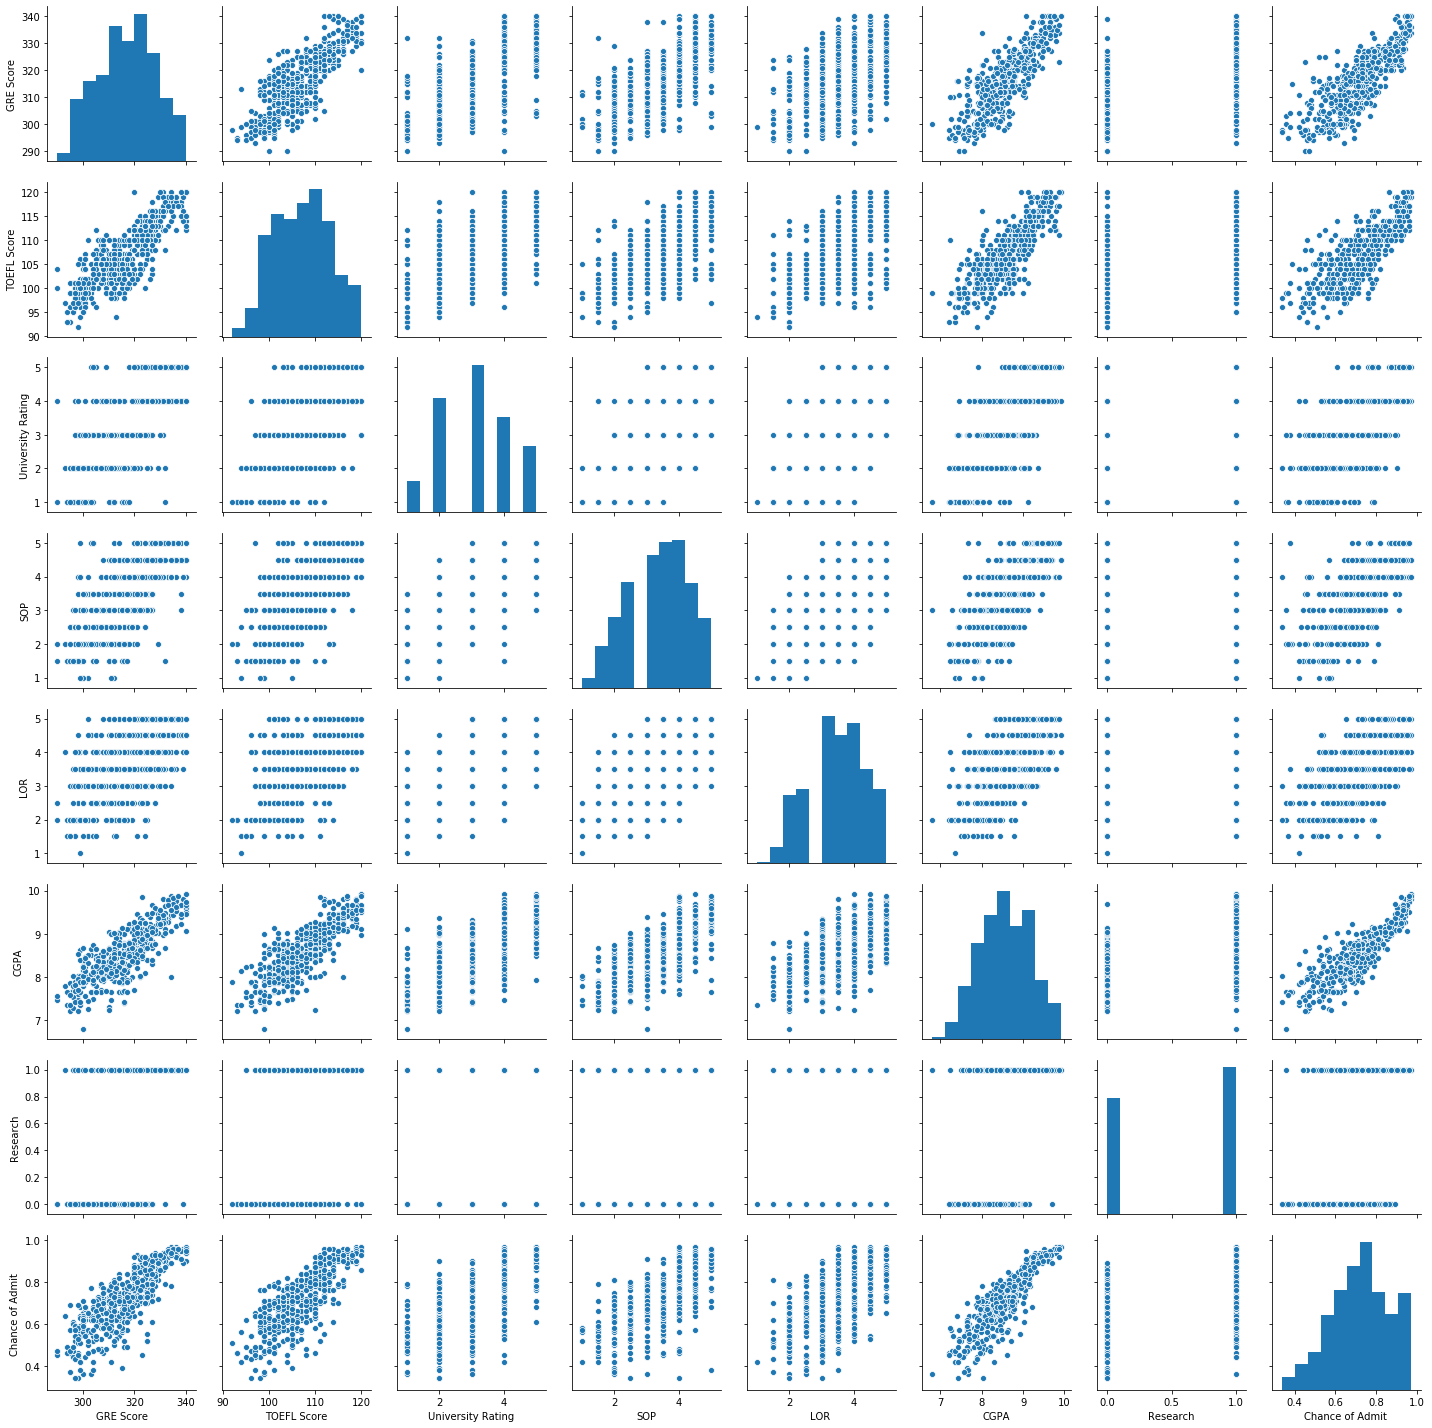

In [206]:
sns.pairplot(df)

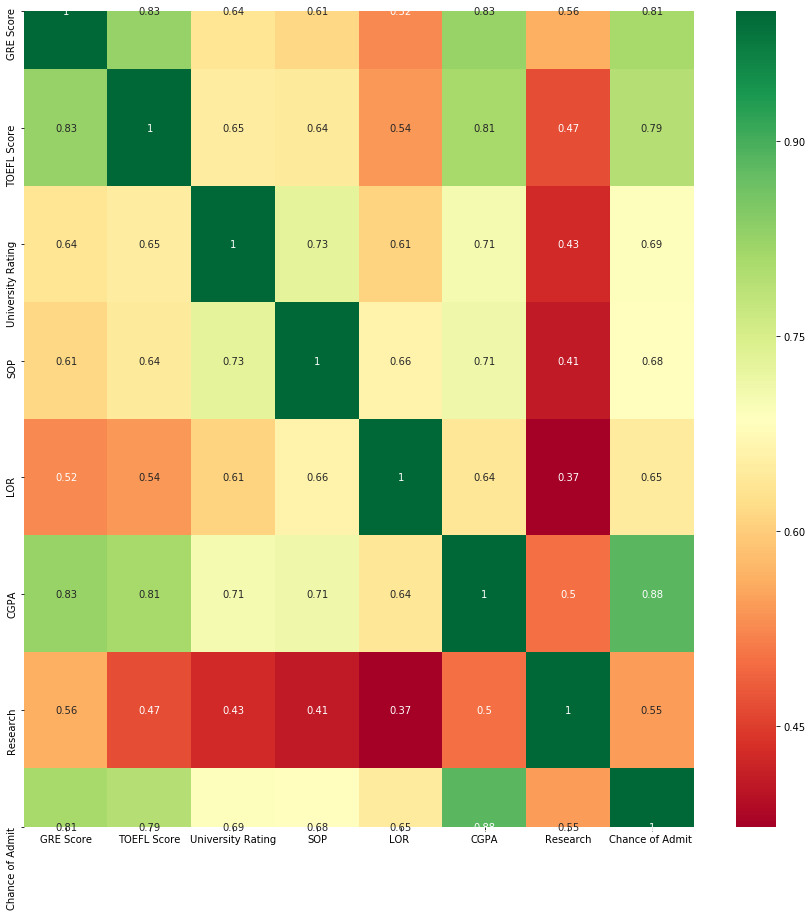

In [228]:
corrmat=df.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(15,15))

sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

From above correlation matrix:
    * CGPA is strongly correlated with all other columns except Research column which is weakly correlated
    * Except research column, the remaining columns are either strongly or very strongly correlated to eachother

In [208]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [209]:
df


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


Here, checking the distributions of all columns.

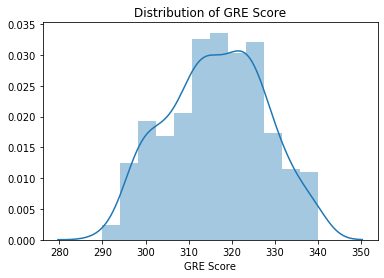

In [171]:
fig=sns.distplot(df['GRE Score'],kde=True)
plt.title("Distribution of GRE Score")
plt.show()

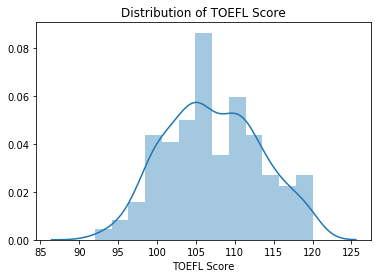

In [172]:
fig=sns.distplot(df['TOEFL Score'],kde=True)
plt.title("Distribution of TOEFL Score")
plt.show()

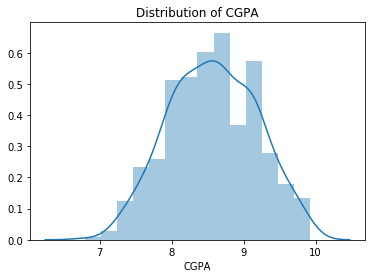

In [173]:
fig=sns.distplot(df['CGPA'],kde=True)
plt.title("Distribution of CGPA")
plt.show()

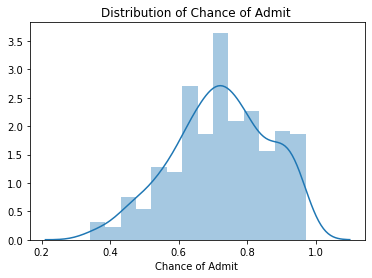

In [83]:
fig=sns.distplot(df['Chance of Admit '],kde=True)
plt.title("Distribution of Chance of Admit ")
plt.show()

From above graphs, all the distributions are either normal or near normal.

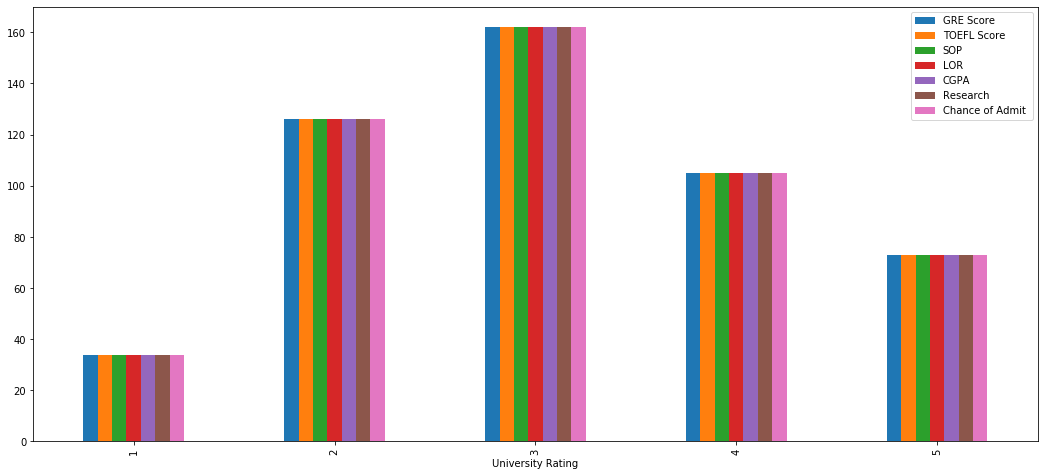

In [84]:
df.groupby('University Rating').count().plot(kind='bar',figsize=(18,8))
plt.show()

From above graph
* University rating of 3 ratings are more followed by 2 rating and 4 rating.

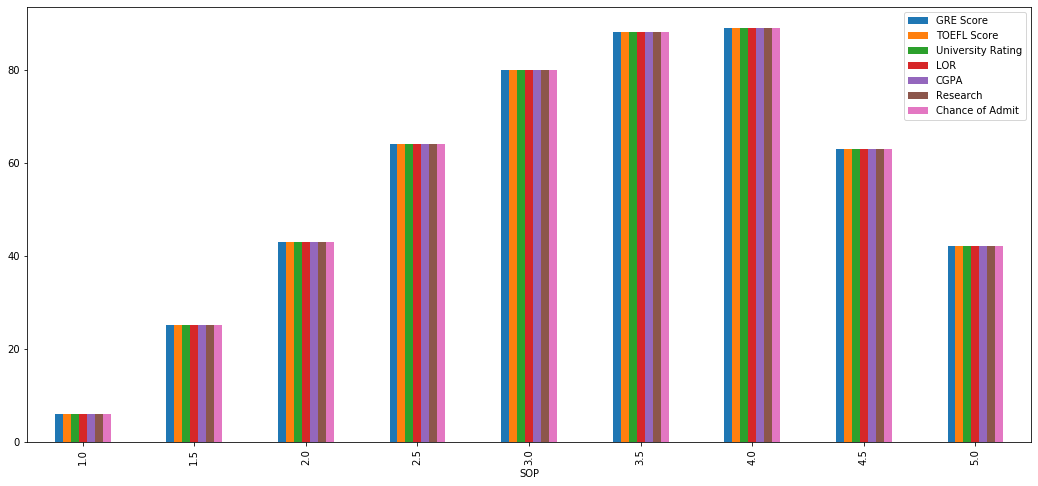

In [22]:
df.groupby('SOP').count().plot(kind='bar',figsize=(18,8))
plt.show()

From above graph
* Most of the SOP's are having strengths of 4 and 3.5 ratings

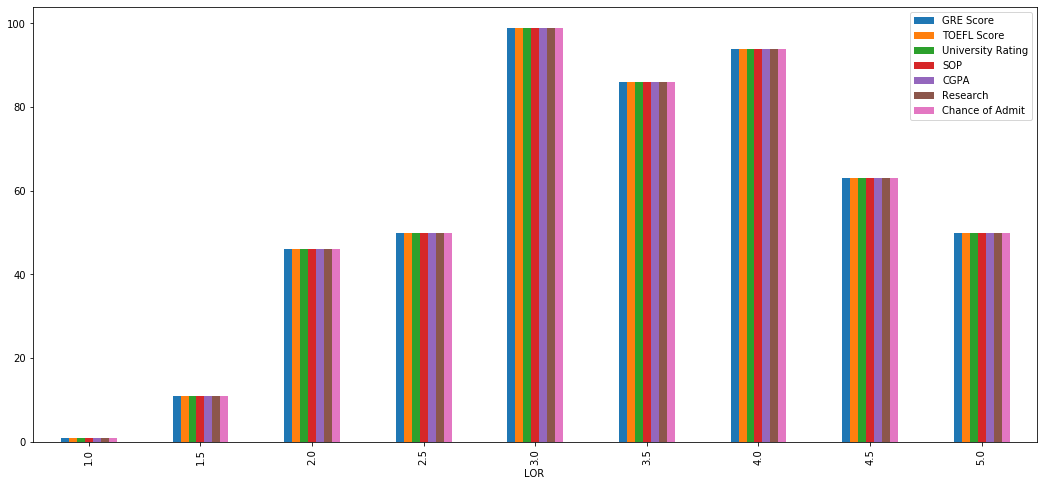

In [23]:
df.groupby('LOR ').count().plot(kind='bar',figsize=(18,8))
plt.show()

From above graph
* Most of the LOR's are having strengths of 3 and 4 ratings

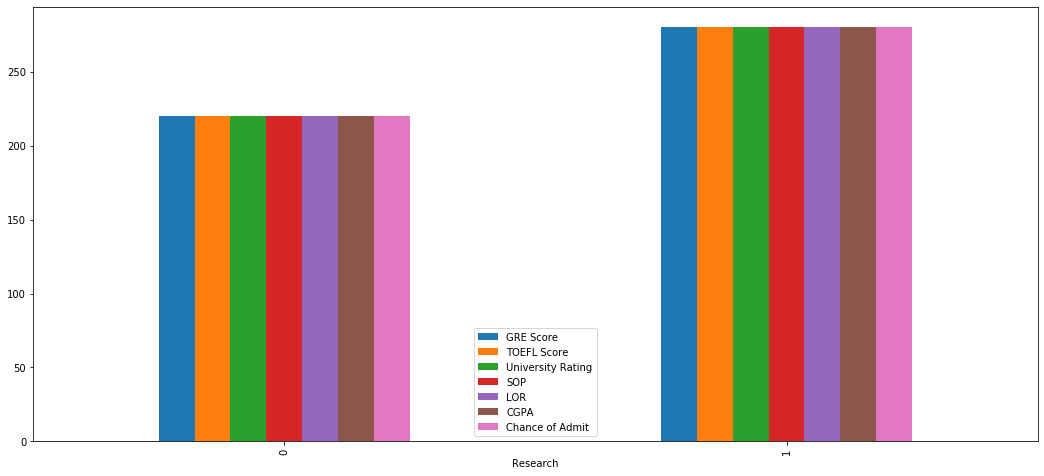

In [24]:
df.groupby('Research').count().plot(kind='bar',figsize=(18,8))
plt.show()

From above graph
* There are around 56 % of Students having a Research experience.

In [25]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

Now,checking any outliers if any with the help of boxplot 
Also, theoutcomes from these boxplot for each column

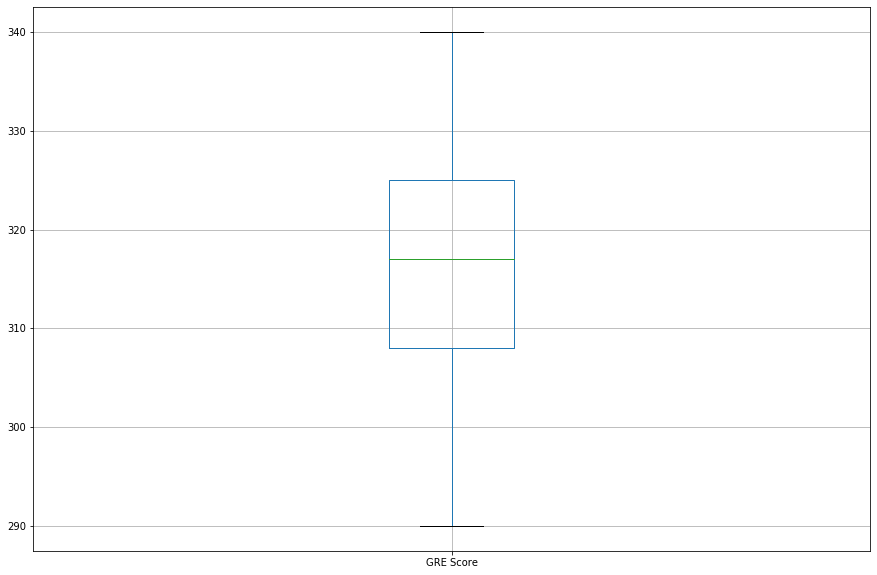

In [26]:
df.boxplot(column="GRE Score",figsize=(15,10))
plt.show()

From the above box plot graph:
    * GRE SCORE
    1) There are no outliers 
    2)25% of values are in range 290 to 308
    2)25% of values are in range 308 to 318
    2)25% of values are in range 318 to 325
    2)25% of values are in range 325 to 340
    * Mean GRE score is around 318
    

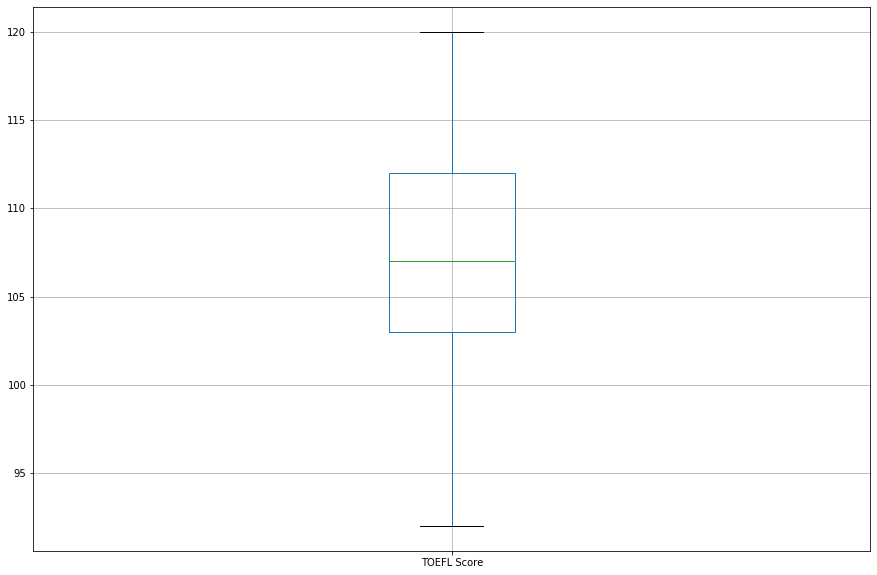

In [27]:
df.boxplot(column="TOEFL Score",figsize=(15,10))
plt.show()

From the above box plot graph:
    * TOEFL SCORE
    1) There are no outliers 
    2)25% of values are in range 92 to 103
    2)25% of values are in range 103 to 107
    2)25% of values are in range 107 to 112
    2)25% of values are in range 112 to 120
    * Mean GRE score is around 107
    

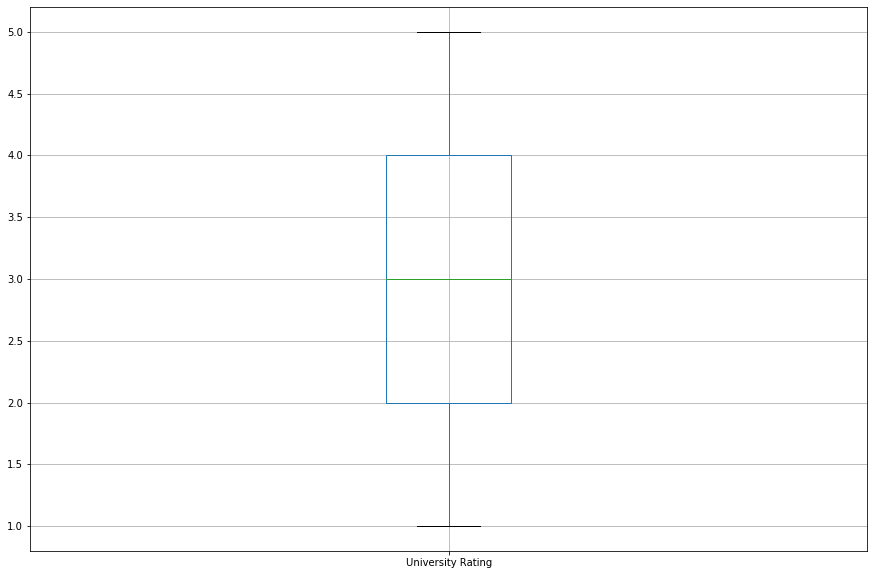

In [28]:
df.boxplot(column="University Rating",figsize=(15,10))
plt.show()

From the above box plot graph:
    * University Rating
    1) There are no outliers 
    2)25% of values are in range 1 to 2
    2)25% of values are in range 2 to 3
    2)25% of values are in range 3 to 4
    2)25% of values are in range 4 to 5
    * Mean University Rating is 3 
    

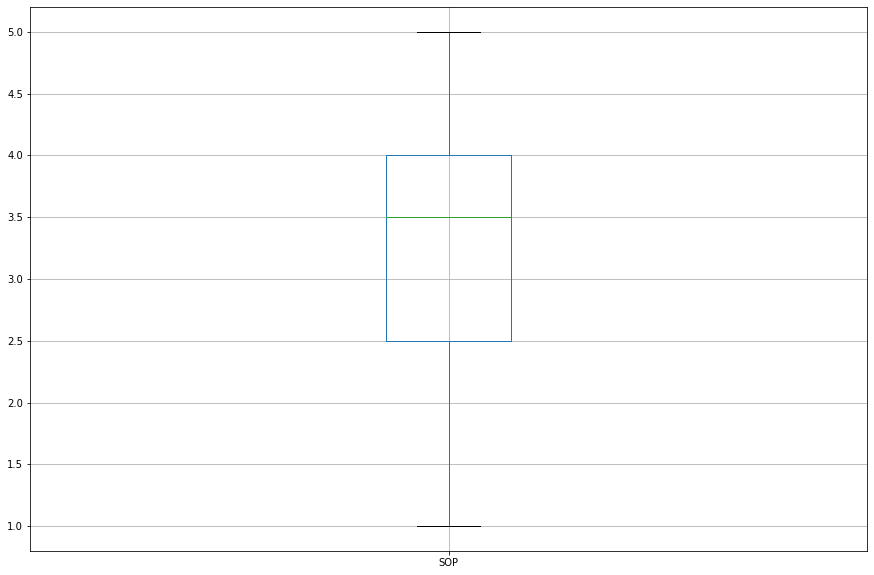

In [29]:
df.boxplot(column="SOP",figsize=(15,10))
plt.show()

From the above box plot graph:
    * SOP
    1) There are no outliers 
    2)25% of values are in range 1 to 2.5
    2)25% of values are in range 2.5 to 3.5
    2)25% of values are in range 3.5 to 4
    2)25% of values are in range 4 to 5
    * Mean SOP is around 3.5
    

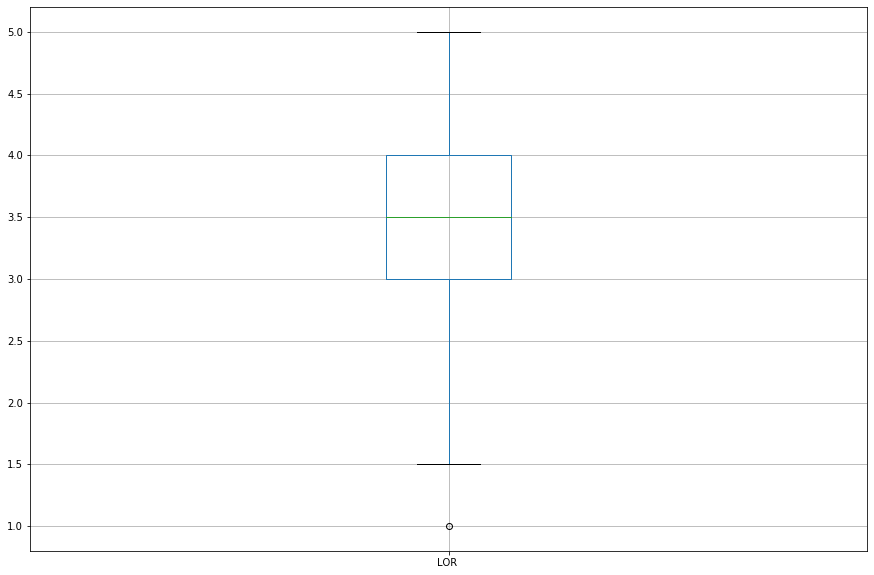

In [30]:
df.boxplot(column="LOR ",figsize=(15,10))
plt.show()

From the above box plot graph:
    * LOR
    1) There are no outliers 
    2)25% of values are in range 1.5 to 3
    2)25% of values are in range 3 to 3.5
    2)25% of values are in range 3.5 to 4
    2)25% of values are in range 4 to 5
    * Mean of LOR is around 3.5
    

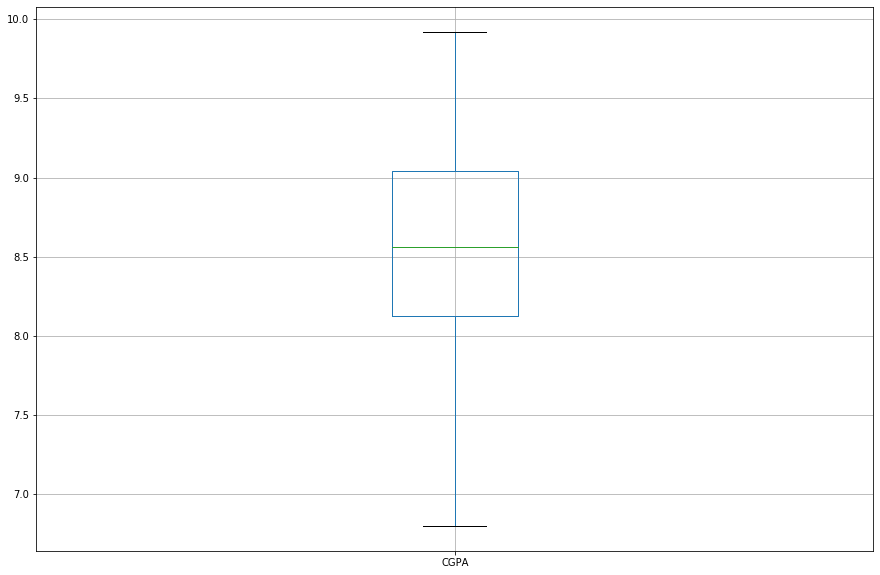

In [31]:
df.boxplot(column="CGPA",figsize=(15,10))
plt.show()

From the above box plot graph:
    * CGPA SCORE
    1) There are no outliers 
    2)25% of values are in range 7 to 8.1
    2)25% of values are in range 8.1 to 8.55
    2)25% of values are in range 8.55 to 9.05
    2)25% of values are in range 9.05 to 9.9
    * Mean of CGPA SCORE is around 8.5
    

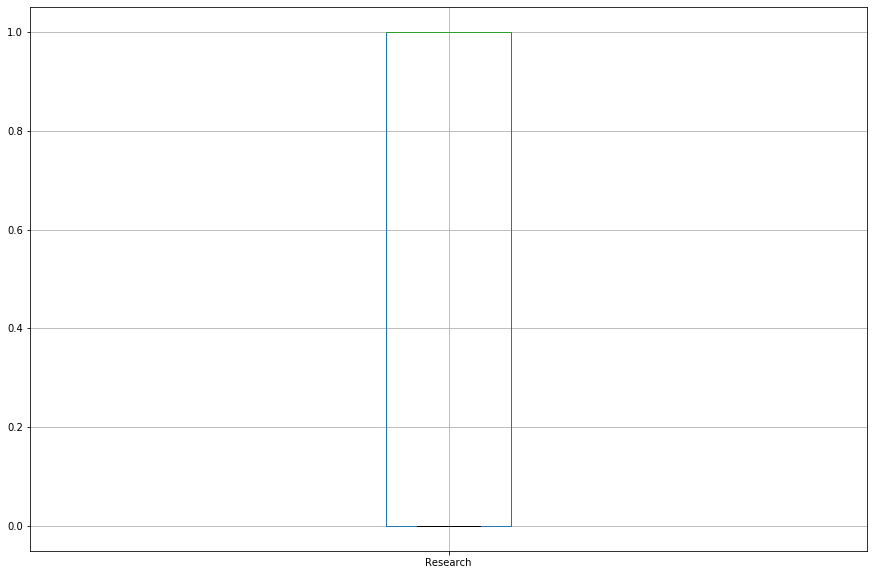

In [32]:
df.boxplot(column="Research",figsize=(15,10))
plt.show()

From the above box plot graph:
    * Research
    1) There are no outliers 
    2)100% of values are in range 0 to 1
    
    * Mean of Research is around 1
    

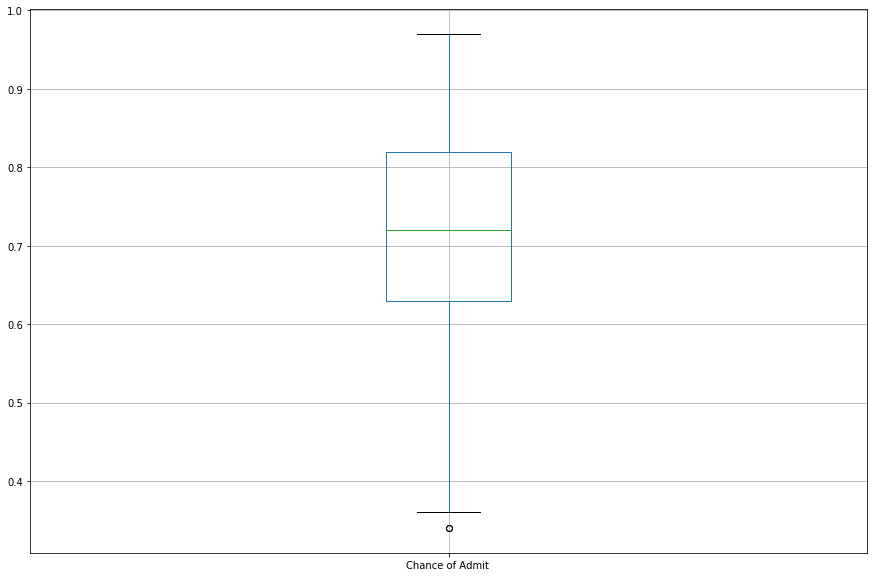

In [33]:
df.boxplot(column="Chance of Admit ",figsize=(15,10))
plt.show()

From the above box plot graph:
    * Chance of Admit
    1) There are no outliers 
    2)25% of values are in range 0.4 to 0.6
    2)25% of values are in range 0.6 to 0.7
    2)25% of values are in range 0.7 to 0.8
    2)25% of values are in range 0.8 to 1
    * Mean Chance of Admit is around 0.7
    

In [229]:
# Handling outlier which we observed only in a columns i.e., LOR

def outlier_IQR(qwerty):
    median=qwerty.median()
    lower_hinge=qwerty.quantile(0.25)
    upper_hinge=qwerty.quantile(0.75)
    IQR=upper_hinge-lower_hinge
    upper_limit=upper_hinge+1.5*IQR
    lower_limit=lower_hinge-1.5*IQR
    qwerty=np.where(qwerty>upper_limit,upper_limit,qwerty)
    qwerty=np.where(qwerty<lower_limit,lower_limit,qwerty)
    return qwerty
    

In [230]:
df['LOR ']=outlier_IQR(df['LOR '])

In [231]:
#Now, Scaling is applied to scale all columns to similar range


from sklearn.preprocessing import MinMaxScaler

mms=MinMaxScaler()

df[['GRE Score','TOEFL Score','CGPA']]=mms.fit_transform(df[['GRE Score','TOEFL Score','CGPA']])



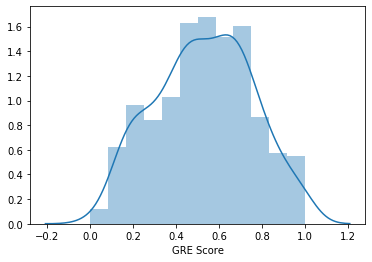

In [211]:
fig=sns.distplot(df['GRE Score'],kde=True)

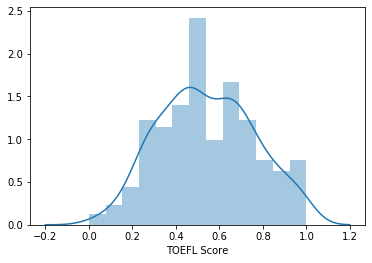

In [212]:
fig=sns.distplot(df['TOEFL Score'],kde=True)

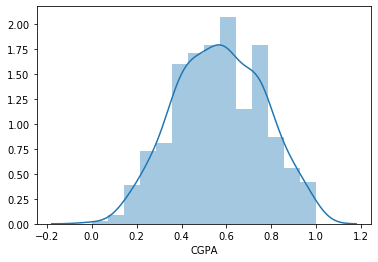

In [213]:
fig=sns.distplot(df['CGPA'],kde=True)

From above graphs we can see all are scaled to one range and also these are nearly normal distributions.

In [214]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

Till now,checking no. of columns, the nulls,the duplicates,dropping the unwanted columns,the relation btw columns,scaling have done.Now, I can apply linear regression model to the data

In [232]:
#Importing necessary packages to split the data as train dataset and test dataset
from sklearn.model_selection import train_test_split

In [233]:
#  Making the Independent variables as X and dependant or Target variable as y by the following code 

X=df.drop(['Chance of Admit '],axis=1)
y=df['Chance of Admit ']

In [234]:
# Split X and y into training and test data sets

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [235]:
#  Importing stats model for applying Linear Redression 

import statsmodels.api as sm

In [236]:
# Adding a constant term
X_train=sm.add_constant(X_train)

In [237]:
X_train

,const,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
110,1.0,0.30,0.571429,5,3.0,3.0,0.538462,0
93,1.0,0.22,0.178571,2,3.0,3.0,0.346154,1
111,1.0,0.62,0.607143,4,4.0,4.0,0.602564,1
317,1.0,0.20,0.250000,1,1.0,2.5,0.387821,0
423,1.0,0.88,0.964286,5,4.5,5.0,0.878205,1
...,...,...,...,...,...,...,...,...
381,1.0,0.58,0.464286,3,3.0,3.5,0.599359,1
285,1.0,0.82,0.857143,5,4.0,4.0,0.788462,1
449,1.0,0.50,0.321429,3,3.5,4.5,0.746795,0
232,1.0,0.44,0.535714,2,2.5,3.5,0.471154,0


In [238]:
# Instantiate the linear regression object as model 
model=sm.OLS(y_train,X_train).fit()

In [54]:
model

In [55]:
# With this we can check the coefficients of all the columns
model.params

const                0.307960
GRE Score            0.089309
TOEFL Score          0.063443
University Rating    0.003977
SOP                  0.006205
LOR                  0.018719
CGPA                 0.382817
Research             0.022110
dtype: float64

In [242]:
# With this summary, we can find some of the calculations that the model predicted.
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Chance of Admit    R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     266.1
Date:                Sat, 23 Apr 2022   Prob (F-statistic):          1.21e-144
Time:                        10:11:09   Log-Likelihood:                 572.26
No. Observations:                 400   AIC:                            -1129.
Df Residuals:                     392   BIC:                            -1097.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3256      0.012     26.619      0.000       0.302       0.350
GRE Score             0.0895      0.027      3.304      0.001       0.036       0.143
TOEFL Score           0.0860      0.027      3.197      0.002       0.033       0.139
University Rating     0.0026      0.004      0.621      0.535      -0.006       0.011
SOP                   0.0059      0.005      1.157      0.248      -0.004       0.016
LOR                   0.0154      0.004      3.442      0.001       0.007       0.024
CGPA                  0.3665      0.033     11.198      0.000       0.302       0.431
Research              0.0247      0.007      3.524      0.000       0.011       0.038
==============================================================================
Omnibus:                       99.539   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              264.722
Skew:                          -1.190   Prob(JB):                     3.28e-58
Kurtosis:                       6.197   Cond. No.                         75.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Regression Metrics:

In [216]:
# For calculating residuals of the model I have imported LinearRegression from sklearn.linear_model

from sklearn.linear_model import LinearRegression

lm=LinearRegression()
lm.fit(X_train,y_train)
y_test_pred=lm.predict(X_test)

In [ ]:
#Metrics calculations - MAE, RMSE, R2, Adj R2 

In [105]:
# Importing necessary libraries for metric calculations fromsklearn.metrics

from sklearn.metrics import mean_squared_error , r2_score, mean_absolute_error

print("MAE:"+str(mean_absolute_error(y_test_pred,y_test)))
print("MSE:"+str(mean_squared_error(y_test_pred,y_test)))
print("RMSE:"+str(np.sqrt(mean_squared_error(y_test_pred,y_test))))
print("r2 score:"+str(r2_score(y_test_pred,y_test)))



MAE:0.04070327590319623
MSE:0.003532858644612419
RMSE:0.05943785531639259
r2 score:0.7663461265926232


### Checking the assumptions

In [57]:
### 1) Checking the Linearty Assumption

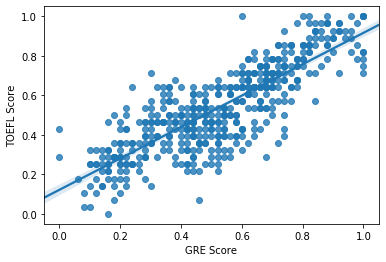

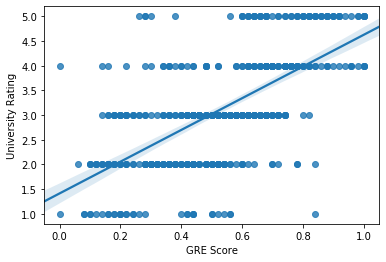

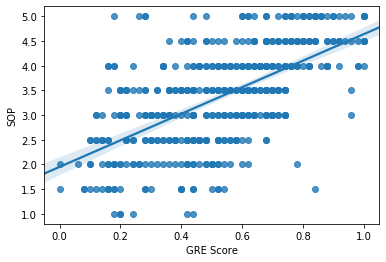

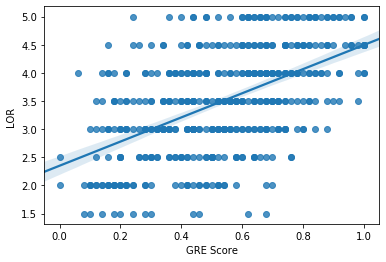

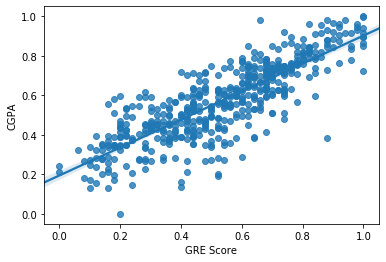

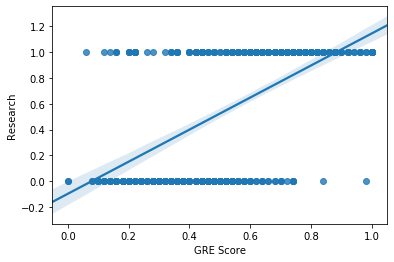

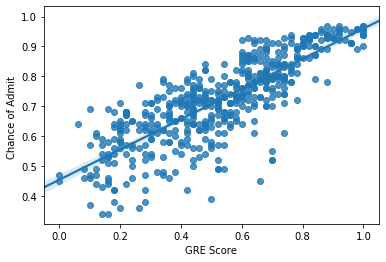

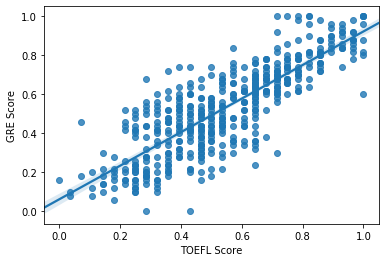

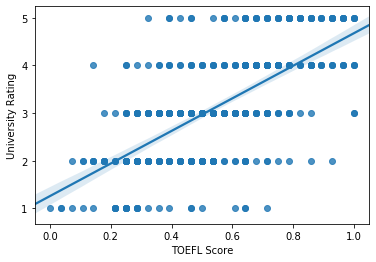

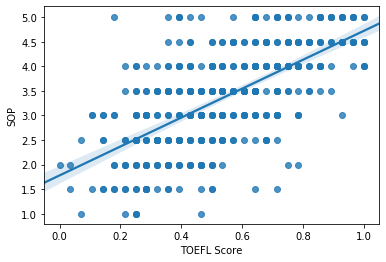

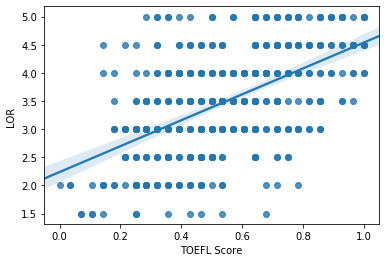

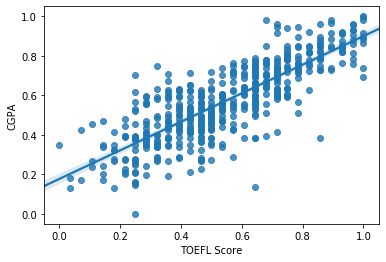

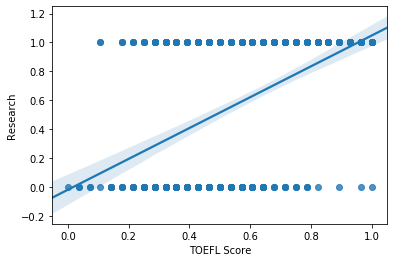

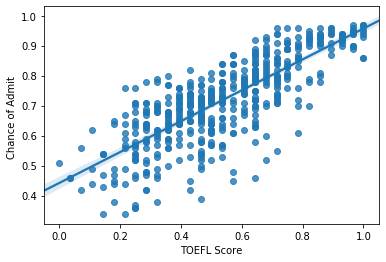

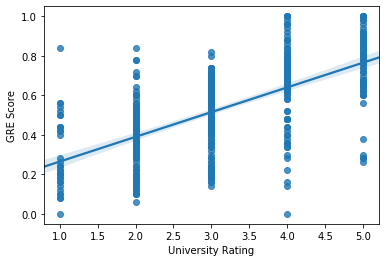

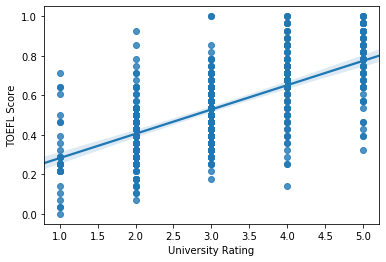

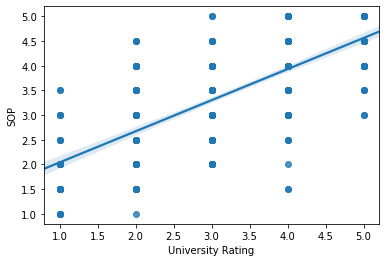

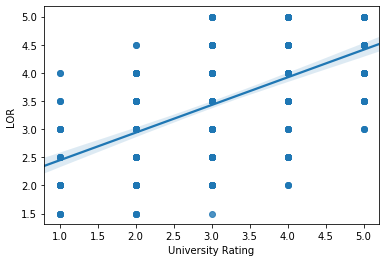

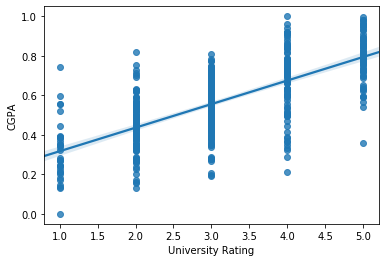

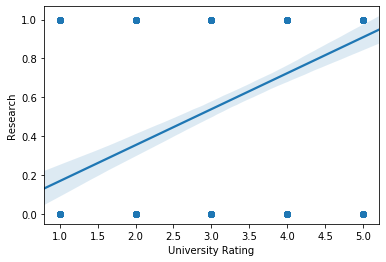

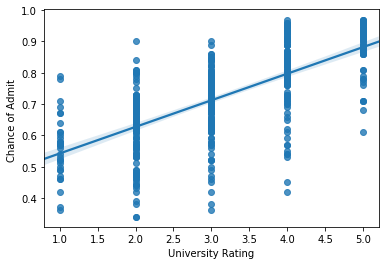

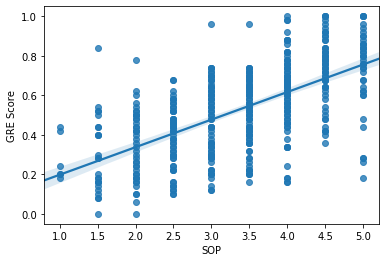

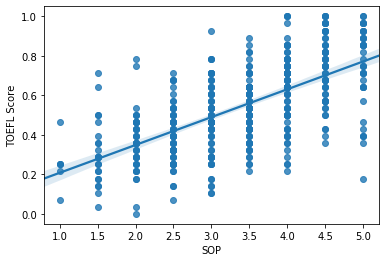

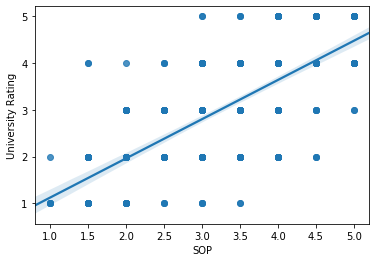

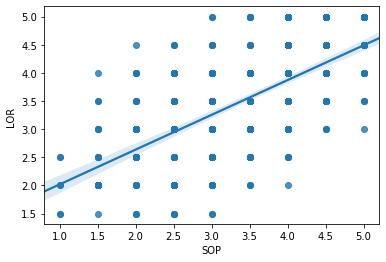

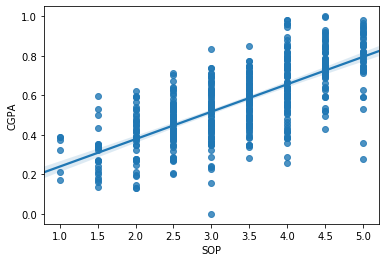

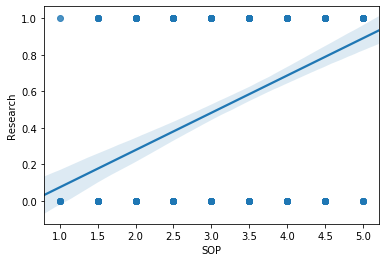

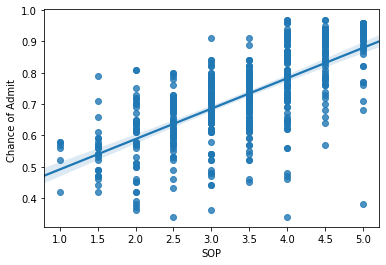

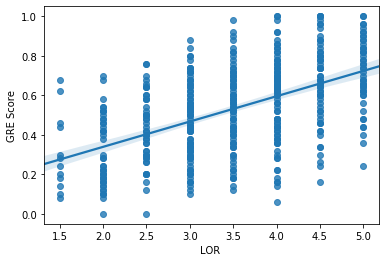

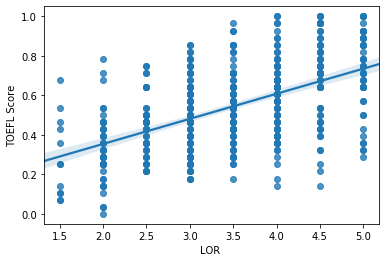

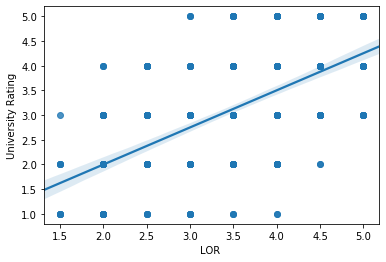

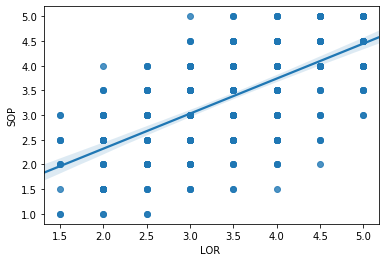

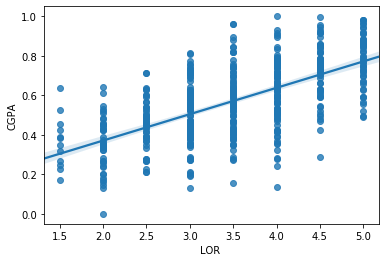

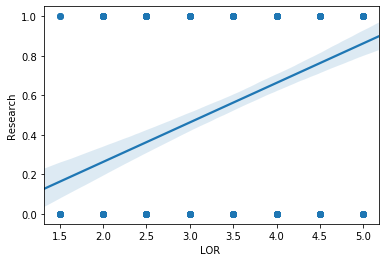

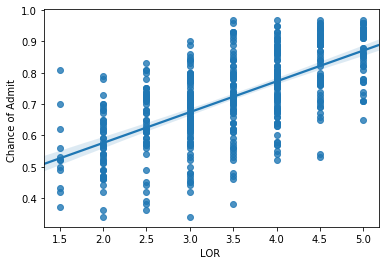

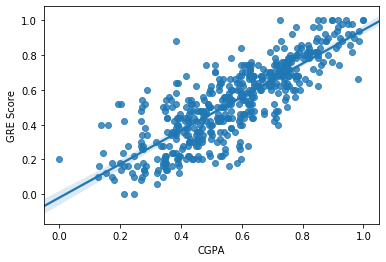

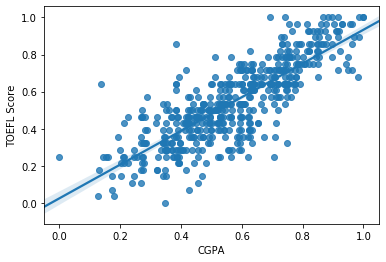

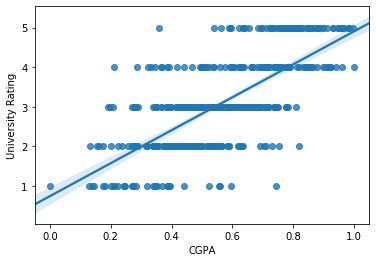

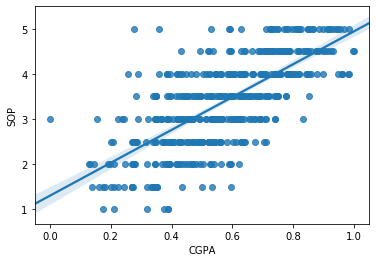

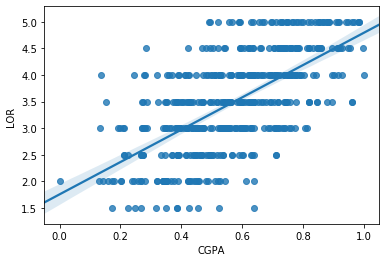

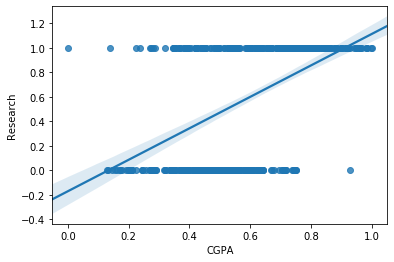

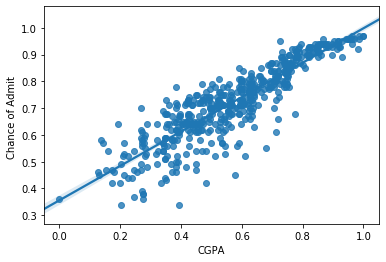

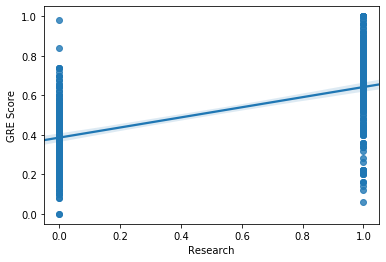

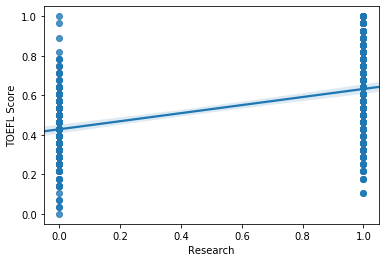

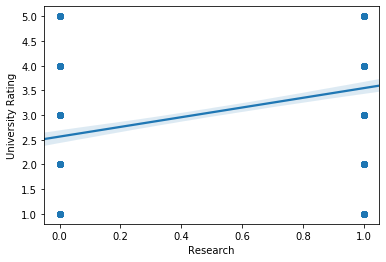

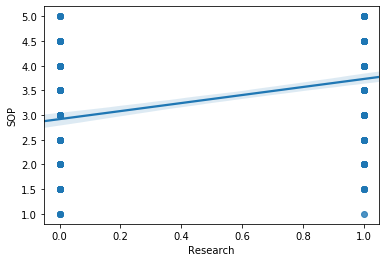

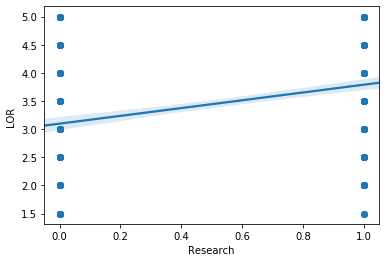

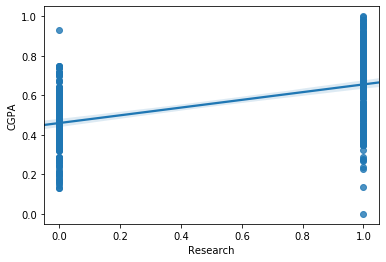

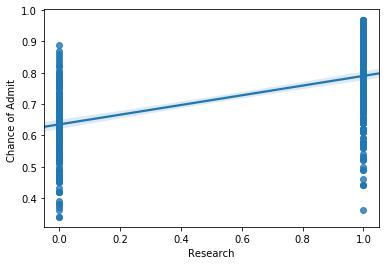

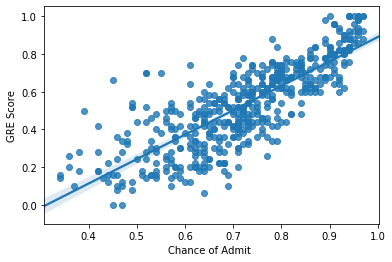

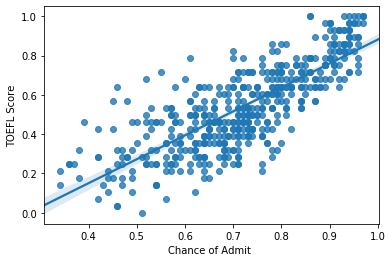

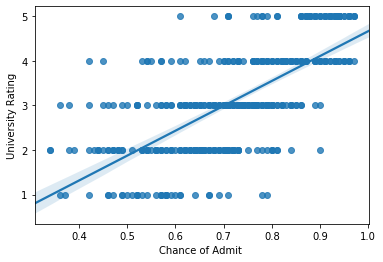

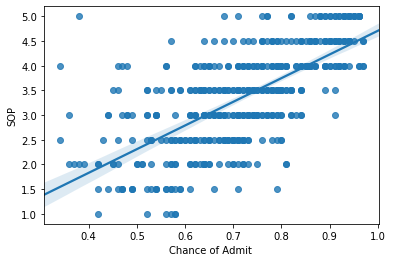

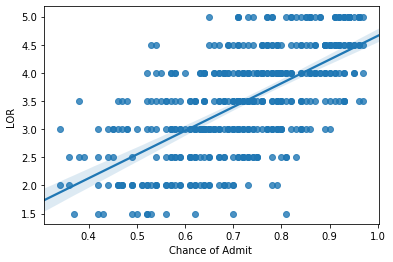

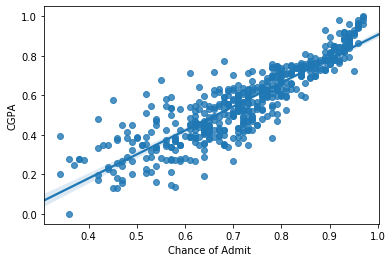

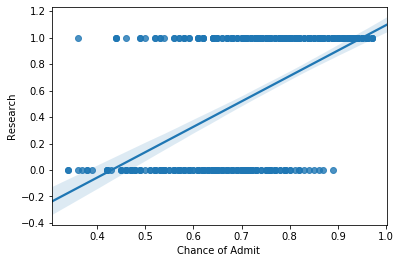

In [58]:

# Function for plotting scatter plot between two columns of dataset
from tqdm import tqdm_notebook as tqdm
tqdm().pandas()
def reg_plot(x,y):
    fig=sns.regplot(x=df[x],y=df[y],data=df)  
    plt.show()

for i in tqdm(df):
  for j in df:
    if i!=j:
      reg_plot(i,j)

From above scatter plot, there exist a linear relationships between the numercal columns.
Or else checking from the heatmap or pairplot we can conclude the same there exist a linear relationship btw the numerical columns

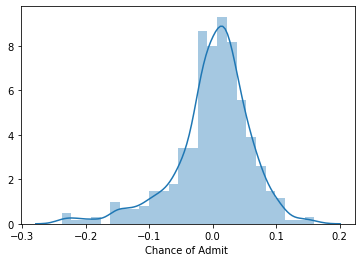

In [108]:
# 2) Normality  check using sklearn 

from sklearn.linear_model import LinearRegression

lm=LinearRegression()
lm.fit(X_train,y_train)


y_train_pred = lm.predict(X_train)
train_residual=y_train-lm.predict(X_train)
sns.distplot(train_residual)


From above graph:
    * Its a normal distribution of residuals for train data

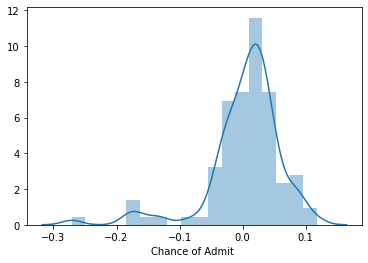

In [109]:

y_test_pred = lm.predict(X_test)
test_residual=y_test-lm.predict(X_test)
sns.distplot(test_residual)

From above graph:
    * Its a near normal distribution of residuals for test data

In [110]:
# 3) No Multicolinearity check:

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(dataset):
    vif=pd.DataFrame()
    vif['features']=dataset.columns
    vif['VIF_value']=[variance_inflation_factor(dataset.values,i) for i in range(dataset.shape[1])]
    return vif

In [240]:
vif_df=calculate_vif(X_train)
vif_df

,features,VIF_value
0,const,17.510655
1,GRE Score,4.348242
2,TOEFL Score,3.885061
3,University Rating,2.457073
4,SOP,2.757645
5,LOR,2.009319
6,CGPA,4.658029
7,Research,1.419162


#Therefore, all of them are having weak VIF scores(i.e.,<5) within them.So, the assumption of no multicolinearity holds true.

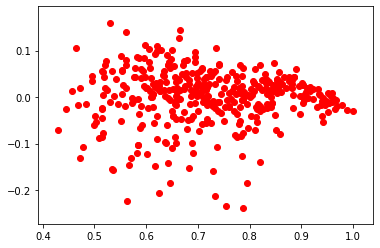

In [112]:
# 4) Homoscedasticity check for train data

plt.scatter(y_train_pred,train_residual,color='red')

From above graph train data,I find there is no such pattern based on prediction & residual values and most of the values are centred around zero

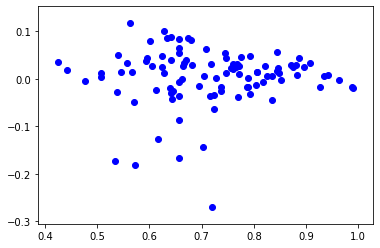

In [113]:

plt.scatter(y_test_pred,test_residual,color='blue')

From above graph of test data,I find there is no such pattern based on prediction & residual values and most of the values are centred around zero

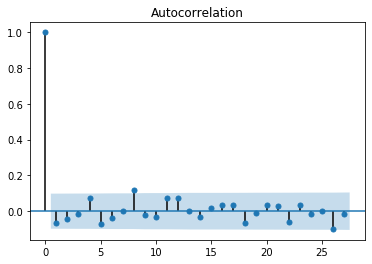

In [241]:
# 5) Auto-correlation assumption check

import statsmodels.tsa.api as smt
acf= smt.graphics.plot_acf(train_residual)
acf.show()

For auto correlation check I have used the above package and library.
    * The graph showing a partial auto correlation as the are spikes a little outside the blue confidence interval region.

Recommendation:
    * From my model predictions, the model not only predict the chance of admit of a student to IVY league college also recommends to focus more on CGPA as the coefficient of CGPA is more followed by the GRE score.